# Your name: Melyssa Moore
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [40]:
# import packages 
import pandas as pd
import numpy as np 


# Data File Reading Section
## Write code to read in data from external sources here

In [41]:
#read datasets
df = pd.read_csv('data.csv', encoding='latin1')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [42]:
# Your code for this section here ...
#1 
df.describe()


,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [43]:
#2
df.shape

(435742, 13)

In [44]:
#3
df.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [45]:
#4
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [46]:
#5
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [47]:
#6
df.head(10)
df.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,9/12/2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/9/2015
435733,SAMP,12/12/2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/12/2015
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/15/2015
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/18/2015
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/21/2015
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [48]:
# Cleaning up the data

#dropping columns that aren't required

df = df.drop(['stn_code', 'agency','sampling_date', 'location_monitoring_station'], axis=1)
df

In [49]:
# dropping rows where no date is available
df = df.dropna(subset=['date'])


In [50]:
# displaying final columns (data.columns)

# ... your code here
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [51]:
# ... Your code here
types = {"Residential":"R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO",
         "Industrial Area":"I", "Industrial Areas": "I", "Industrial":"I",
         "Sensitive Area": "S", "Sensitive Areas":"S", "Sensitive":"S", np.nan:"RRO"}

df.type = df.type.replace(types)

In [52]:
# Display top 10 records after codification of 'types'
# ... Your code here
print(df.type.head(n=10))

0    RRO
1      I
2    RRO
3    RRO
4      I
5    RRO
6    RRO
7      I
8    RRO
9      I
Name: type, dtype: object


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [53]:
# ... Your code here
df['year']=pd.DatetimeIndex(df['date']).year.astype(np.int64)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,2/1/1990,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,2/1/1990,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,2/1/1990,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,3/1/1990,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,3/1/1990,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [54]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

# ... your code here
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
cols = ['so2','no2','rspm','spm', 'pm2_5']
df[cols] = imputer.fit_transform(df[cols])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435735 non-null  object 
 1   location  435735 non-null  object 
 2   type      435735 non-null  object 
 3   so2       435735 non-null  float64
 4   no2       435735 non-null  float64
 5   rspm      435735 non-null  float64
 6   spm       435735 non-null  float64
 7   pm2_5     435735 non-null  float64
 8   date      435735 non-null  object 
 9   year      435735 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 36.6+ MB


## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [55]:
#using this for bar charts
import matplotlib.pyplot as plt

In [66]:
statewise_so2 = df[['so2', 'state']].groupby('state', as_index = False).median().sort_values(by='so2')
statewise_so2.head(5)

,state,so2
22,Nagaland,2.0
21,Mizoram,2.0
20,Meghalaya,2.0
1,Arunachal Pradesh,2.5
12,Himachal Pradesh,3.0


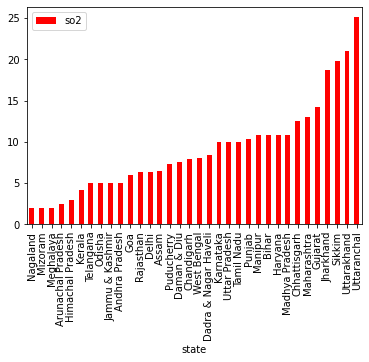

In [76]:
statewise_so2.plot(kind='bar', x = 'state', y = 'so2', color = 'r')

### no2 status

In [77]:
statewise_no2 = df[['no2', 'state']].groupby('state', as_index = False).median().sort_values(by='no2')
statewise_no2.head(5)

,state,no2
1,Arunachal Pradesh,5.0
21,Mizoram,5.0
22,Nagaland,7.0
20,Meghalaya,10.0
9,Goa,11.6


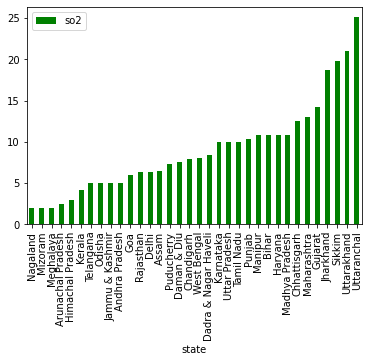

In [78]:
statewise_so2.plot(kind='bar', x = 'state', y = 'so2', color = 'g')

### rspm status

In [79]:
statewise_rspm = df[['rspm', 'state']].groupby('state', as_index = False).median().sort_values(by='rspm')
statewise_rspm.head(5)

,state,rspm
27,Sikkim,32.0
21,Mizoram,40.0
24,Puducherry,46.0
16,Kerala,49.0
9,Goa,56.0


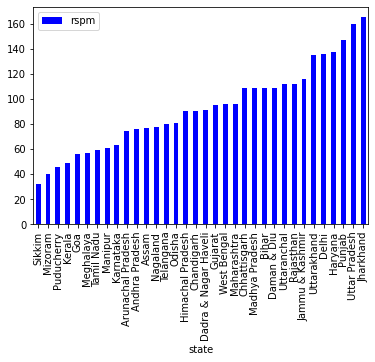

In [80]:
statewise_rspm.plot(kind='bar', x = 'state', y = 'rspm', color = 'b')

### spm status

In [81]:
statewise_spm = df[['spm', 'state']].groupby('state', as_index = False).median().sort_values(by='spm')
statewise_spm.head(5)

,state,spm
27,Sikkim,75.0
19,Manipur,120.5
24,Puducherry,191.0
9,Goa,199.0
7,Daman & Diu,200.5


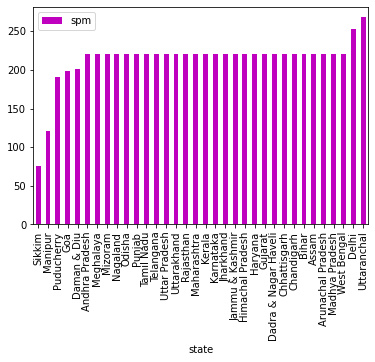

In [83]:
statewise_spm.plot(kind='bar', x = 'state', y = 'spm', color = 'm')

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [84]:
andhra_pradesh = df[df['state']=='Andhra Pradesh']
year_for_andhra = andhra_pradesh[['so2','no2','rspm','spm','year']].groupby('year').median()
year_for_andhra.head()

,so2,no2,rspm,spm
year,,,,
1990,5.60,13.6,108.833091,179.00000
1991,8.25,12.8,108.833091,141.50000
1992,12.40,27.6,108.833091,192.00000
1993,6.00,11.4,108.833091,220.78348
1994,8.70,14.2,108.833091,220.78348


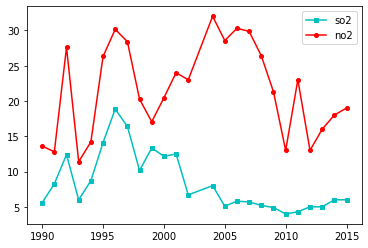

In [105]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.
plt.plot(year_for_andhra['so2'], '-sc', markersize = 4, label='so2')
plt.plot(year_for_andhra['no2'],'-or', markersize=4, label='no2')
plt.legend()


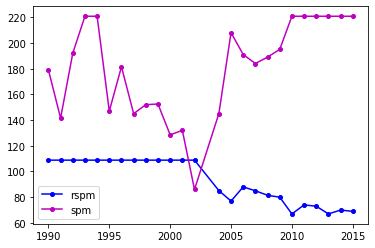

In [106]:
plt.plot(year_for_andhra['rspm'],'-ob', markersize=4, label='rspm')
plt.plot(year_for_andhra['spm'], '-om', markersize=4, label = 'spm')
plt.legend()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



I find the the last chart particularly alarming because while we see a decline in the Suspended Particulate Matter, the Respirable Suspended Particuate Matter is still very high. There was great progress in the decline of rspm in the early 2000's, however all that progress was lost over the next 10 years and still remains high. While no2 and so2 have both flucuated over the years, I would like to see the numbers slowly decreasing rather than flucuating. I think this city needs to work a considerable amount to help reduce the pollution in the air for the health and safety of their citizens. 